In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

## __1 - Business Problem__  
___Calories_consumed-> predict weight gained using calories consumed___

## __2 - Data collection and description__ 

In [2]:
df = pd.read_csv("C:/Users/Sohail/OneDrive/Data Science/Assignments/Simple Linear Regression/Raw Data/calories_consumed.csv")

In [3]:
x = df['Calories Consumed']
y = df['Weight gained (grams)']

### __Scatter Plot__

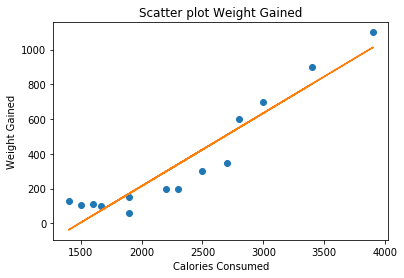

In [4]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Weight Gained')
plt.xlabel('Calories Consumed')
plt.ylabel('Weight Gained')
plt.show()

As displayed in the scatter plot, the data does contains some outliers, but there is potive correlation between calories consumed and weight gained

### __Correlation Analysis__

In [5]:
corr = np.corrcoef(x, y)

Corr  
array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])  

The correlation between Calories consumed and weight gained is high (94%)

## __3 - Regression Model__ 

### __1 - No transformation__ 

In [6]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [7]:
model.summary()

C:\Users\Sohail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.806
Model:                               OLS   Adj. R-squared (uncentered):              0.791
Method:                    Least Squares   F-statistic:                              53.95
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    5.63e-06
Time:                           20:03:31   Log-Likelihood:                         -94.855
No. Observations:                     14   AIC:                                      191.7
Df Residuals:                         13   BIC:                                      192.3
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.1762      0.024      7.345      0.000       0.124       0.228
==============================================================================
Omnibus:                        4.807   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.081
Skew:                           1.148   Prob(JB):                        0.214
Kurtosis:                       2.893   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __2 - Log Transformation of X__ 

In [8]:
x_log = np.log(df['Calories Consumed'])

In [9]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.588
Model:                               OLS   Adj. R-squared (uncentered):              0.556
Method:                    Least Squares   F-statistic:                              18.56
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    0.000851
Time:                           20:03:45   Log-Likelihood:                         -100.12
No. Observations:                     14   AIC:                                      202.2
Df Residuals:                         13   BIC:                                      202.9
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed    47.7934     11.095      4.308      0.001      23.825      71.762
==============================================================================
Omnibus:                        4.807   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.032
Skew:                           1.139   Prob(JB):                        0.220
Kurtosis:                       2.932   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __3 - Log Transformation of Y__ 

In [11]:
y_log = np.log(df['Weight gained (grams)'])

In [12]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.974
Model:                               OLS   Adj. R-squared (uncentered):              0.972
Method:                    Least Squares   F-statistic:                              490.2
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    1.05e-11
Time:                           20:04:05   Log-Likelihood:                         -18.295
No. Observations:                     14   AIC:                                      38.59
Df Residuals:                         13   BIC:                                      39.23
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.0022      0.000     22.141      0.000       0.002       0.002
==============================================================================
Omnibus:                        1.372   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.432
Skew:                          -0.428   Prob(JB):                        0.806
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __4 - Log Transformation of X & Y__ 

In [14]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.985
Model:                               OLS   Adj. R-squared (uncentered):              0.984
Method:                    Least Squares   F-statistic:                              850.9
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    3.11e-13
Time:                           20:04:16   Log-Likelihood:                         -14.512
No. Observations:                     14   AIC:                                      31.02
Df Residuals:                         13   BIC:                                      31.66
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.7152      0.025     29.171      0.000       0.662       0.768
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.582
Skew:                           0.174   Prob(JB):                        0.747
Kurtosis:                       2.063   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __5 - Sq Root Transformation of X__ 

In [16]:
x_sqrt = np.sqrt(df['Calories Consumed'])

In [17]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.687
Model:                               OLS   Adj. R-squared (uncentered):              0.663
Method:                    Least Squares   F-statistic:                              28.59
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    0.000133
Time:                           20:04:33   Log-Likelihood:                         -98.187
No. Observations:                     14   AIC:                                      198.4
Df Residuals:                         13   BIC:                                      199.0
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     8.2430      1.542      5.347      0.000       4.913      11.573
==============================================================================
Omnibus:                        5.192   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.257
Skew:                           1.181   Prob(JB):                        0.196
Kurtosis:                       2.999   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __6 - Square Root Transformation of Y__ 

In [19]:
y_sqrt = np.sqrt(df['Weight gained (grams)'])

In [20]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.973
Model:                               OLS   Adj. R-squared (uncentered):              0.971
Method:                    Least Squares   F-statistic:                              463.0
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    1.51e-11
Time:                           20:04:42   Log-Likelihood:                         -35.819
No. Observations:                     14   AIC:                                      73.64
Df Residuals:                         13   BIC:                                      74.28
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.0076      0.000     21.518      0.000       0.007       0.008
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.423
Skew:                           0.125   Prob(JB):                        0.809
Kurtosis:                       2.186   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __7 - Square Root Transformation of X & Y__ 

In [22]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.918
Model:                               OLS   Adj. R-squared (uncentered):              0.912
Method:                    Least Squares   F-statistic:                              146.2
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):                    1.91e-08
Time:                           20:04:51   Log-Likelihood:                         -43.485
No. Observations:                     14   AIC:                                      88.97
Df Residuals:                         13   BIC:                                      89.61
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.3746      0.031     12.093      0.000       0.308       0.442
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.559
Skew:                           0.723   Prob(JB):                        0.459
Kurtosis:                       2.236   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## __4 - Output Interpretation__ 

We will use Model 4 as it has the best R square value

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == 0.715  
Thus if the value of calories consumed is increased by 1, the predicted value of weight gained will increase by 0.72

3 - Adj. R-sqared == 0.984  
Thus the model explains 98.4% of the variance in dependent variable